# 1. Import required libraries

In [1]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 2. Generate synthetic dataset

In [2]:
# Fix random seed for reproducibility
np.random.seed(42)

In [3]:
# Create 1000 samples with 2 features each
X = np.random.rand(1000,2)

In [4]:
# Create binary labels:
# Class 1 if sum of features > 1, else Class 0

y = (X[:,0] + X[:,1] > 1).astype(int)

In [5]:
# 5. Split the dataset into
#    training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 3. Initialize Decision Tree model

In [6]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
# 8. Make predictions on test data
y_pred = clf.predict(X_test)

In [8]:
# 9. Evaluate model performance
accuracy = accuracy_score(y_test,y_pred)

# # 3. Define function to evaluate sample complexity

In [11]:
def evaluate_sample_complexity(X,y,max_depth=3):
    train_sizes = np.linspace(0.1,0.9,10)
    accuracies = []
    
    for train_size in train_sizes:
        X_train,X_test,y_train,y_test = train_test_split(
            X,y,train_size=train_size,random_state=42
        )

        
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf.fit(X_train,y_train)
        
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
    df = pd.DataFrame({
            'Train Size' : train_sizes,
            'Accuracy':accuracies
    })
    return df

# 4. Run the experiment

In [12]:
df = evaluate_sample_complexity(X,y)
print(df)

   Train Size  Accuracy
0    0.100000  0.890000
1    0.188889  0.899015
2    0.277778  0.905947
3    0.366667  0.894322
4    0.455556  0.899083
5    0.544444  0.910088
6    0.633333  0.923706
7    0.722222  0.902878
8    0.811111  0.920635
9    0.900000  0.940000


# 5. Plot learning curve

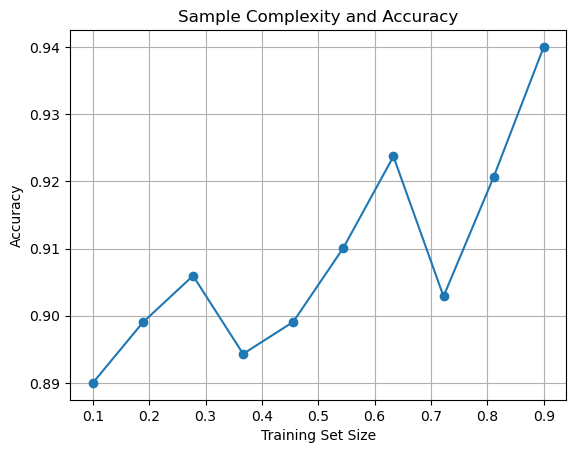

In [19]:
plt.plot(df['Train Size'],df['Accuracy'],marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Sample Complexity and Accuracy')
plt.grid(True)
plt.show()